# Car Dealer Website Web Scraping Project

### Link for website: https://cars.com

### Importing libraries and making a get request

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
website = 'https://www.cars.com/shopping/results/?stock_type=all&makes%5B%5D=dodge&models%5B%5D=&list_price_max=&maximum_distance=20&zip='

response = requests.get(website)
response.status_code

200

In [3]:
# Creating a soup object

soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
results = soup.find_all('div', {'class':'vehicle-card'})

In [5]:
len(results)

19

## Target Data
* Name
* Year
* Mileage
* Rating
* Review count
* Price
* Dealer name

### Getting target data of one car

In [7]:
# Name
results[0].find('h2').get_text()[5:]

'Dodge Challenger R/T Scat Pack'

In [8]:
# Year
results[0].find('h2').get_text()[:4]

'2020'

In [9]:
# Mileage
results[0].find('div', {'class':'mileage'}).get_text()

'2,553 mi.'

In [10]:
# Rating
results[0].find('span', {'class':'sds-rating__count'}).get_text()

'4.8'

In [11]:
# Reviews count
results[0].find('span', {'class':'sds-rating__link'}).get_text()

'(532 reviews)'

In [12]:
# Price
results[0].find('span', {'class':'primary-price'}).get_text()

'$50,987'

In [13]:
# Dealer name
results[0].find('div', {'class':'dealer-name'}).get_text().replace('\n', "")

'Bolles Motors'

## Putting everything inside a for-loop

In [14]:
name = []
year = []
mileage = []
price = []
rating = []
reviews_count = []
dealer = []

for result in results:
    # name
    try:
        name.append(result.find('h2').get_text()[5:])
    except:
        name.append(None)
        
    # year
    try:
        year.append(result.find('h2').get_text()[:4])
    except:
        year.append(None)
           
    # mileage
    try:
        mileage.append(result.find('div', {'class':'mileage'}).get_text())
    except:
        mileage.append(None)
        
    # price
    try:
        price.append(result.find('span', {'class':'primary-price'}).get_text())
    except:
        price.append(None)
        
    # rating
    try:
        rating.append(result.find('span', {'class':'sds-rating__count'}).get_text()) 
    except:
        rating.append(None)
        
    # reviews count
    try:
        reviews_count.append(result.find('span', {'class':'sds-rating__link'}).get_text().replace('(',"").replace(' reviews)',""))
    except:
        reviews_count.append(None)
        
    # dealer name
    try:
        dealer.append(result.find('div', {'class':'dealer-name'}).get_text().replace('\n', ""))
    except:
        dealer.append(None)

In [15]:
name

['Dodge Challenger R/T Scat Pack',
 'Dodge Charger SXT',
 'Dodge Challenger SXT',
 'Dodge Charger SRT 392',
 'Dodge Charger Scat Pack',
 'Dodge Durango GT',
 'Dodge Durango GT',
 'Dodge Durango R/T',
 'Dodge Durango R/T',
 'Dodge Challenger R/T Scat Pack',
 'Dodge Charger R/T',
 'Dodge Durango R/T',
 'Dodge Durango Limited',
 'Dodge Journey SXT',
 'Dodge Challenger SRT Hellcat',
 'Dodge Challenger R/T',
 'Dodge Charger Scat Pack',
 'Dodge Charger SRT Hellcat',
 'Dodge Challenger SXT']

### First page of the website was scraped, now let's insert the data into a dataframe.

In [16]:
firts_page = pd.DataFrame({'Name': name,
                           'Year': year,
                           'Mileage': mileage,
                           'Price': price,
                           'Rating': rating,
                           'Reviews Count': reviews_count,
                           'Car Dealer': dealer})
firts_page

,Name,Year,Mileage,Price,Rating,Reviews Count,Car Dealer
0,Dodge Challenger R/T Scat Pack,2020,"2,553 mi.","$50,987",4.8,532,Bolles Motors
1,Dodge Charger SXT,2016,"134,734 mi.","$16,493",3.9,121,AutoNation USA Houston
2,Dodge Challenger SXT,2019,"32,977 mi.","$25,000",4.6,284,AutoSavvy Las Vegas
3,Dodge Charger SRT 392,2018,"34,171 mi.","$49,990",4.2,"8,995",Carvana-Touchless Delivery To Your Home
4,Dodge Charger Scat Pack,2020,"34,880 mi.","$49,999",4.7,306,Apollo Auto Sales
5,Dodge Durango GT,2018,"32,733 mi.","$38,662",4.5,138,Fitzgerald Chrysler Dodge Jeep RAM Hagerstown
6,Dodge Durango GT,2018,"61,902 mi.","$35,490",4.8,"3,300",Champion Chevrolet of Avon
7,Dodge Durango R/T,2021,"14,238 mi.","$51,995",4.9,359,AMG Auto Route 35
8,Dodge Durango R/T,2021,"15,672 mi.","$50,995",4.9,359,AMG Auto Route 35
9,Dodge Challenger R/T Scat Pack,2019,"27,663 mi.","$46,964",4.5,111,Ron Tonkin Mazda


### The logic applied above is suitable for getting data from one page only. Now let's build another loop to scrape the data from multiple pages.

In [17]:
# Target data variables
name = []
year = []
mileage = []
price = []
rating = []
reviews_count = []
dealer = []

for i in range(1, 15):
    # website variable 
    website = f'https://www.cars.com/shopping/results/?page={str(i)}&page_size=20&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=dodge&maximum_distance=20&mileage_max=&sort=best_match_desc&stock_type=all&year_max=&year_min=&zip='
    # making a request
    response = requests.get(website)
    # creating a soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    results = soup.find_all('div', {'class':'vehicle-card'})

    for result in results:
        # name
        try:
            name.append(result.find('h2').get_text()[5:])
        except:
            name.append(None)
        # year
        try:
            year.append(result.find('h2').get_text()[:4])
        except:
            year.append(None)
        # mileage
        try:
            mileage.append(result.find('div', {'class':'mileage'}).get_text())
        except:
            mileage.append(None)
        # price
        try:
            price.append(result.find('span', {'class':'primary-price'}).get_text())
        except:
            price.append(None)
        # rating
        try:
            rating.append(result.find('span', {'class':'sds-rating__count'}).get_text()) 
        except:
            rating.append(None)
        # reviews count
        try:
            reviews_count.append(result.find('span', {'class':'sds-rating__link'}).get_text().replace('(',"").replace(' reviews)',"").replace(' review)',""))
        except:
            reviews_count.append(None)
        # dealer name
        try:
            dealer.append(result.find('div', {'class':'dealer-name'}).get_text().replace('\n', ""))
        except:
            dealer.append(None)

In [140]:
data = pd.DataFrame({'Name': name,
                     'Year': year,
                     'Mileage': mileage,
                     'Price': price,
                     'Rating': rating,
                     'Reviews Count': reviews_count,
                     'Car Dealer': dealer})
data

,Name,Year,Mileage,Price,Rating,Reviews Count,Car Dealer
0,Dodge Challenger R/T Scat Pack,2020,"2,553 mi.","$50,987",4.8,532,Bolles Motors
1,Dodge Charger SXT,2016,"134,734 mi.","$16,493",3.9,121,AutoNation USA Houston
2,Dodge Challenger SXT,2019,"32,977 mi.","$25,000",4.6,284,AutoSavvy Las Vegas
3,Dodge Charger SRT 392,2018,"34,171 mi.","$49,990",4.2,"8,995",Carvana-Touchless Delivery To Your Home
4,Dodge Charger Scat Pack,2020,"34,880 mi.","$49,999",4.7,306,Apollo Auto Sales
...,...,...,...,...,...,...,...
273,Dodge Durango GT,2018,"33,088 mi.","$31,895",3.6,11,Serpentini Chevrolet Westlake
274,Dodge Charger SXT,2020,"17,595 mi.","$29,991",4.4,"1,721",Greenville Chrysler
275,Dodge Journey Crossroad,2020,"50,124 mi.","$24,277",4.3,119,Tim Short Chrysler Dodge Jeep Ram Ford
276,Dodge Charger SXT,2019,"64,439 mi.","$29,631",4.7,"1,785",Rountree Moore Toyota


### Data cleaning 

#### Turning object values to numerical

In [141]:
data['Price'] = data['Price'].str.replace('$', '', regex=True)
data['Price'] = data['Price'].str.replace(',', '', regex=True)
data['Price'] = data['Price'].astype('int64')
data.rename(columns={'Price':'Price in USD'}, inplace=True)

data

,Name,Year,Mileage,Price in USD,Rating,Reviews Count,Car Dealer
0,Dodge Challenger R/T Scat Pack,2020,"2,553 mi.",50987,4.8,532,Bolles Motors
1,Dodge Charger SXT,2016,"134,734 mi.",16493,3.9,121,AutoNation USA Houston
2,Dodge Challenger SXT,2019,"32,977 mi.",25000,4.6,284,AutoSavvy Las Vegas
3,Dodge Charger SRT 392,2018,"34,171 mi.",49990,4.2,"8,995",Carvana-Touchless Delivery To Your Home
4,Dodge Charger Scat Pack,2020,"34,880 mi.",49999,4.7,306,Apollo Auto Sales
...,...,...,...,...,...,...,...
273,Dodge Durango GT,2018,"33,088 mi.",31895,3.6,11,Serpentini Chevrolet Westlake
274,Dodge Charger SXT,2020,"17,595 mi.",29991,4.4,"1,721",Greenville Chrysler
275,Dodge Journey Crossroad,2020,"50,124 mi.",24277,4.3,119,Tim Short Chrysler Dodge Jeep Ram Ford
276,Dodge Charger SXT,2019,"64,439 mi.",29631,4.7,"1,785",Rountree Moore Toyota


In [142]:
data.dtypes

Name             object
Year             object
Mileage          object
Price in USD      int64
Rating           object
Reviews Count    object
Car Dealer       object
dtype: object

In [143]:
data['Year'] = data['Year'].astype('int64')

In [144]:
data['Mileage'] = data['Mileage'].replace(' mi.', "", regex=True)
data['Mileage'] = data['Mileage'].replace(',', '.', regex=True)
data['Mileage'] = data['Mileage'].astype('float64')
data.rename(columns={'Mileage':'Mileage in mi.'}, inplace=True)
data.head()

,Name,Year,Mileage in mi.,Price in USD,Rating,Reviews Count,Car Dealer
0,Dodge Challenger R/T Scat Pack,2020,2.553,50987,4.8,532,Bolles Motors
1,Dodge Charger SXT,2016,134.734,16493,3.9,121,AutoNation USA Houston
2,Dodge Challenger SXT,2019,32.977,25000,4.6,284,AutoSavvy Las Vegas
3,Dodge Charger SRT 392,2018,34.171,49990,4.2,"8,995",Carvana-Touchless Delivery To Your Home
4,Dodge Charger Scat Pack,2020,34.880,49999,4.7,306,Apollo Auto Sales


In [145]:
data.dtypes

Name               object
Year                int64
Mileage in mi.    float64
Price in USD        int64
Rating             object
Reviews Count      object
Car Dealer         object
dtype: object

In [146]:
data.Rating.unique()

array(['4.8', '3.9', '4.6', '4.2', '4.7', '4.5', '4.9', None, '4.4',
       '3.7', '3.6', '4.1', '4.3', '4.0', '2.0', '3.5', '2.1', '1.8',
       '5.0', '3.2', '3.8', '3.1', '1.6', '3.3', '2.2', '3.4', '3.0'],
      dtype=object)

#### Dropping rows with NaN values

In [147]:
data = data.dropna(axis=0)

In [148]:
import warnings
warnings.filterwarnings('ignore')

data.Rating = data.Rating.astype('float64')
data['Reviews Count'] = data['Reviews Count'].replace(',', '', regex=True)
data['Reviews Count'] = data['Reviews Count'].astype('int64')

In [149]:
data.dtypes

Name               object
Year                int64
Mileage in mi.    float64
Price in USD        int64
Rating            float64
Reviews Count       int64
Car Dealer         object
dtype: object

In [150]:
data.head()

,Name,Year,Mileage in mi.,Price in USD,Rating,Reviews Count,Car Dealer
0,Dodge Challenger R/T Scat Pack,2020,2.553,50987,4.8,532,Bolles Motors
1,Dodge Charger SXT,2016,134.734,16493,3.9,121,AutoNation USA Houston
2,Dodge Challenger SXT,2019,32.977,25000,4.6,284,AutoSavvy Las Vegas
3,Dodge Charger SRT 392,2018,34.171,49990,4.2,8995,Carvana-Touchless Delivery To Your Home
4,Dodge Charger Scat Pack,2020,34.880,49999,4.7,306,Apollo Auto Sales


#### Exporting data to Excel

In [174]:
data.to_excel('cars.xlsx')

In [151]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Cars amount by their release years')

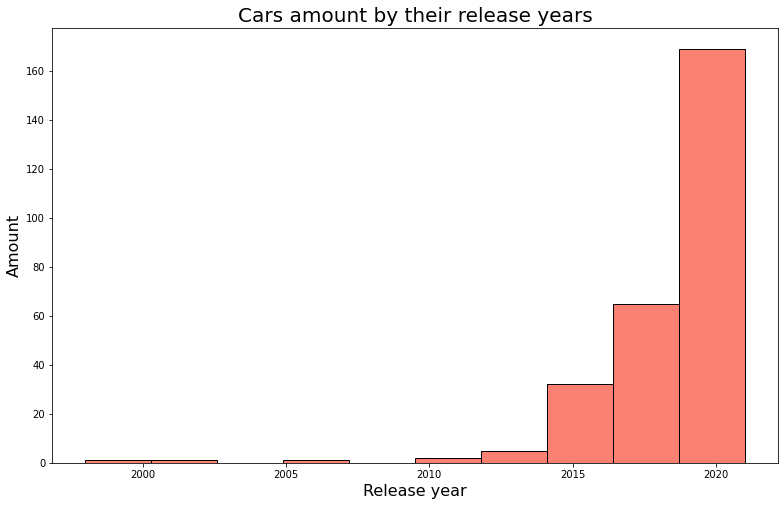

In [152]:
plt.figure(figsize=(13,8))
plt.hist(data.Year.sort_values(), color='salmon', edgecolor='black')
plt.xlabel('Release year', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.title('Cars amount by their release years', fontsize=20)

#### Visualized correlation matrix

<AxesSubplot:>

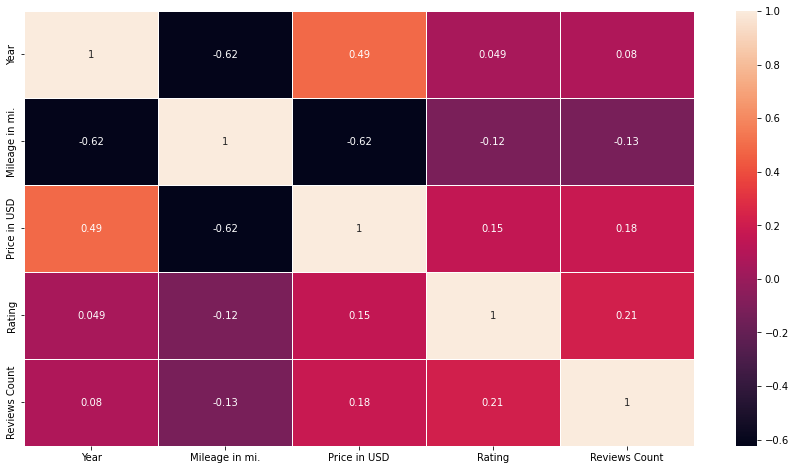

In [153]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, linecolor='white', linewidths=.6)